In [8]:
import pandas as pd
import numpy as np
import yfinance as yf
raw_data = yf.download('SAREGAMA.NS', start="2020-01-01",  end="2020-11-30")
df = pd.DataFrame(raw_data)['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [9]:
df

Date
2020-01-01    40.166729
2020-01-02    40.185387
2020-01-03    39.672340
2020-01-06    38.814156
2020-01-07    38.590282
                ...    
2020-11-23    71.912109
2020-11-24    71.841934
2020-11-25    70.349319
2020-11-26    72.244331
2020-11-27    73.180130
Name: Adj Close, Length: 229, dtype: float64

Optimal Lag: 11


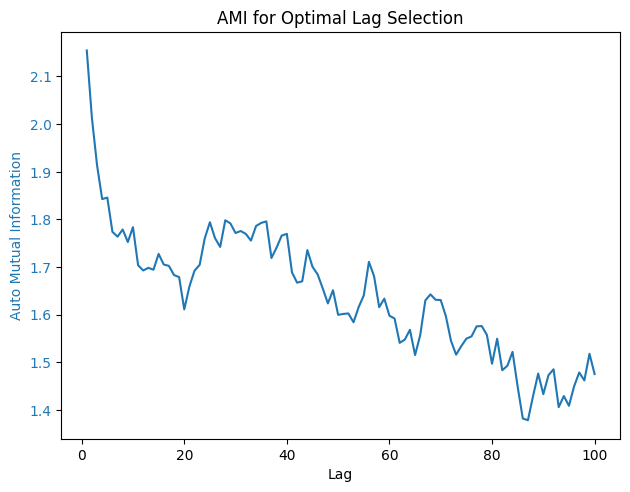

In [10]:
#Finding the optimum lag for the time series using the auto mutual information technique 

import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt

def auto_mutual_information(time_series, max_lag):
    ami = []
    for lag in range(1, max_lag + 1):
        x = time_series[:-lag]
        y = time_series[lag:]
        joint_prob, _, _ = np.histogram2d(x, y, bins=30)
        joint_prob = joint_prob / joint_prob.sum()
        x_prob = joint_prob.sum(axis=1)
        y_prob = joint_prob.sum(axis=0)
        ami.append(entropy(joint_prob.flatten(), np.outer(x_prob, y_prob).flatten()))
    return ami

def cc1_method(time_series, max_lag):
    ami = auto_mutual_information(time_series, max_lag)

    # Find the first local minimum in AMI
    for i in range(1, len(ami) - 1):
        if ami[i] < ami[i-1] and ami[i] < ami[i+1] and ami[i] < ami[i-2] and ami[i] < ami[i+2]:
            ami_min_lag = i
            break

    return ami_min_lag, ami

if __name__ == "__main__":

    time_series = df.values

    max_lag = 100
    optimal_lag, ami = cc1_method(time_series, max_lag)

    print(f"Optimal Lag: {optimal_lag}")

    # Plotting AMI for visualization
    fig, ax1 = plt.subplots()

    color = 'tab:blue'
    ax1.set_xlabel('Lag')
    ax1.set_ylabel('Auto Mutual Information', color=color)
    ax1.plot(range(1, max_lag + 1), ami, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title('AMI for Optimal Lag Selection')
    plt.show()
